K Nearest Neighbors

In [1]:
# Step 1: Import libraries
import numpy as np                              # for numerical arrays
import pandas as pd                             # for data handling
from sklearn.datasets import load_iris          # built-in iris dataset
from sklearn.model_selection import train_test_split  # split data
from sklearn.preprocessing import StandardScaler       # scaling features
from sklearn.neighbors import KNeighborsClassifier     # KNN algorithm
from sklearn.metrics import (accuracy_score,           # evaluation metrics
                             precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix)
import matplotlib.pyplot as plt                   # plotting
import seaborn as sns                             # prettier plots
import joblib                                     # to save model


In [2]:
# Step 2: Load dataset
iris = load_iris()                                # contains features + labels
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # convert to DataFrame
y = pd.Series(iris.target)                        # species labels (0,1,2)

In [14]:
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
y_names = y.map(species_map)

df = X.copy()
df['species'] = y_names
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
X.info()
X.describe()
X.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [15]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# stratify=y → keeps species ratio same in train/test sets


In [16]:
# Step 4: Scale features
scaler = StandardScaler()                         # initializes scaler object
X_train_scaled = scaler.fit_transform(X_train)    # fit on train + transform
X_test_scaled = scaler.transform(X_test)          # only transform test

In [30]:
# Step 5: Initialize KNN model
knn = KNeighborsClassifier(
    n_neighbors=5,        # K value (number of neighbors to consider)
    metric='minkowski',   # distance measure (default minkowski)
    p=2                   # p=2 → Euclidean distance, p=1 → Manhattan
)

In [31]:
# Step 6: Train model
knn.fit(X_train_scaled, y_train)                  # KNN stores training data

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [32]:
# Step 7: Predict class labels
y_pred = knn.predict(X_test_scaled)               # predicted classes (0,1,2)

In [33]:
# Step 8: Evaluation metrics
acc = accuracy_score(y_test, y_pred)              # overall accuracy
prec = precision_score(y_test, y_pred, average='macro')  # avg precision
rec = recall_score(y_test, y_pred, average='macro')      # avg recall
f1 = f1_score(y_test, y_pred, average='macro')           # avg F1

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333332
F1 Score: 0.9326599326599326


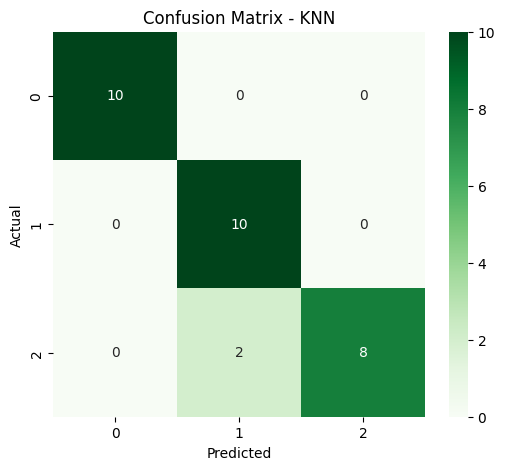

In [34]:
# Step 9: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)             # counts correct/mistakes
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

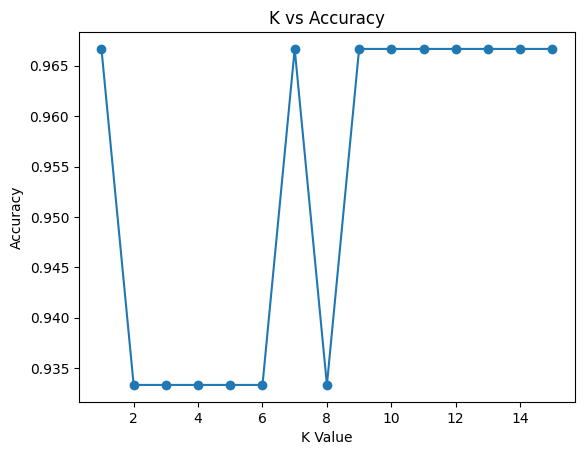

In [35]:
# Step 10: Check performance for different K values
k_values = range(1, 16)
accuracies = []

for k in k_values:
    temp_knn = KNeighborsClassifier(n_neighbors=k)
    temp_knn.fit(X_train_scaled, y_train)
    y_temp_pred = temp_knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_temp_pred))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

In [36]:
# Step 11: GridSearchCV for optimal K
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_neighbors": list(range(1, 21)),  # test 1–20 neighbors
    "p": [1, 2]                          # Manhattan or Euclidean
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'n_neighbors': 5, 'p': 2}


In [37]:
# Step 12: Save model + predictions
joblib.dump(knn, "C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Models\\knn_model.pkl")                # save model
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
pred_df.to_csv("C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Predictions\\KNN_Predictions.csv", index=False)